In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Car Details.csv')

In [3]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5,Y


# Clean the data:- Seperate Numeric Values

In [6]:
df['mileage'] = df['mileage'].str.split(r'kmpl').str.get(0)

In [7]:
df['mileage'] = df['mileage'].str.split(r'km/kg').str.get(0)

In [8]:
df['engine'] = df['engine'].str.split(r'CC').str.get(0)

In [9]:
df['max_power'] = df['max_power'].str.split(r'bhp').str.get(0)

In [10]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4,1248,74,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0,1396,90,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5,Y


In [11]:
df.drop('Sales_ID',axis=1,inplace=True)

# Seperating company name from the model name for better analysis

In [12]:
brand = df.name.str.split(' ').str.get(0)

In [13]:
df.insert(loc = 0,column = 'brand',value = brand)

In [14]:
model = df['name'].str.split(' ').str[1] + df['name'].str.split(' ').str[2]

In [15]:
df.insert(loc = 2,column = 'model',value = model)

In [16]:
df.head()

,brand,name,model,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,Maruti,Maruti Swift Dzire VDI,SwiftDzire,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4,1248,74,5,Y
1,Skoda,Skoda Rapid 1.5 TDI Ambition,Rapid1.5,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y
2,Honda,Honda City 2017-2020 EXi,City2017-2020,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5,Y
3,Hyundai,Hyundai i20 Sportz Diesel,i20Sportz,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0,1396,90,5,Y
4,Maruti,Maruti Swift VXI BSIII,SwiftVXI,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5,Y


In [17]:
df.drop('name',axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              7906 non-null   object
 1   model              7906 non-null   object
 2   year               7906 non-null   int64 
 3   selling_price      7906 non-null   int64 
 4   km_driven          7906 non-null   int64 
 5   Region             7906 non-null   object
 6   State or Province  7906 non-null   object
 7   City               7906 non-null   object
 8   fuel               7906 non-null   object
 9   seller_type        7906 non-null   object
 10  transmission       7906 non-null   object
 11  owner              7906 non-null   object
 12  mileage            7906 non-null   object
 13  engine             7906 non-null   object
 14  max_power          7906 non-null   object
 15  seats              7906 non-null   int64 
 16  sold               7906 non-null   object


In [19]:
df.head()

,brand,model,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,Maruti,SwiftDzire,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4,1248,74,5,Y
1,Skoda,Rapid1.5,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,Y
2,Honda,City2017-2020,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5,Y
3,Hyundai,i20Sportz,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0,1396,90,5,Y
4,Maruti,SwiftVXI,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5,Y


In [20]:
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)

In [21]:
df['current_year'] = 2022
ageofcar = df['current_year'] - df['year']
df.insert(loc = 2,column = 'ageofcar',value = ageofcar)
df.drop('current_year',axis=1,inplace=True)
df.head()

,brand,model,ageofcar,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,Maruti,SwiftDzire,8,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Y
1,Skoda,Rapid1.5,8,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Y
2,Honda,City2017-2020,16,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Y
3,Hyundai,i20Sportz,12,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Y
4,Maruti,SwiftVXI,15,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Y


In [22]:
df.drop('year',axis=1,inplace=True)

# I will prefer dropping the State and City column as it seems it is not required in my model for analysis.

In [23]:
df.drop(['State or Province','City'],axis=1,inplace=True)

In [24]:
df.head()

,brand,model,ageofcar,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold
0,Maruti,SwiftDzire,8,450000,145500,East,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5,Y
1,Skoda,Rapid1.5,8,370000,120000,East,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,Y
2,Honda,City2017-2020,16,158000,140000,Central,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5,Y
3,Hyundai,i20Sportz,12,225000,127000,Central,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5,Y
4,Maruti,SwiftVXI,15,130000,120000,East,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,Y


In [25]:
df.describe()

,ageofcar,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,8.016064,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,2.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,5.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,7.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,10.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,28.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


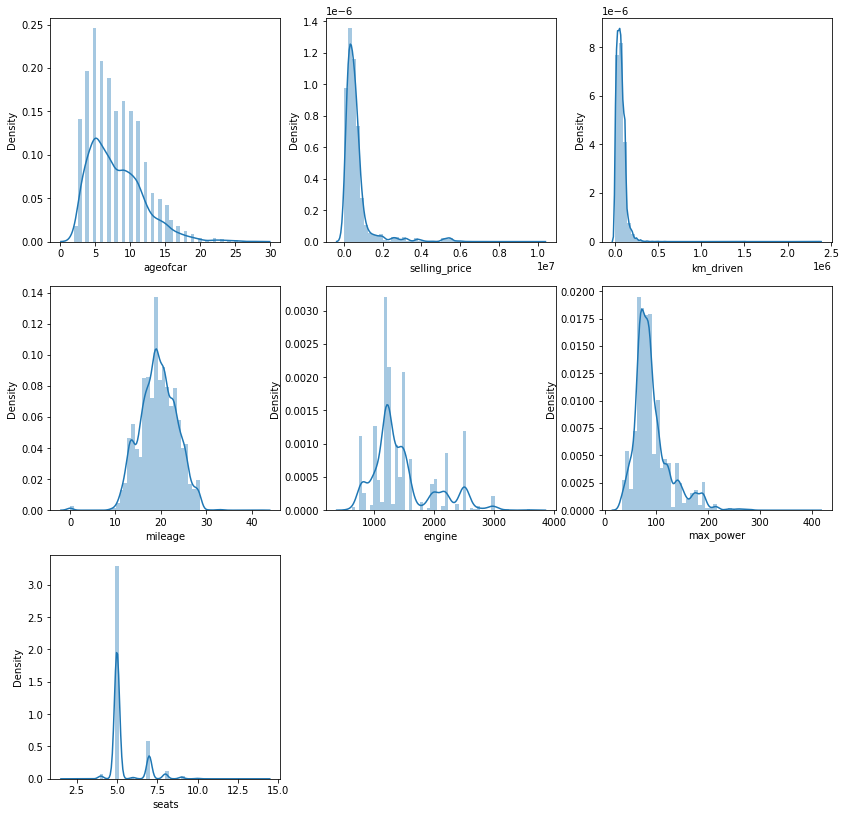

In [26]:
plt.figure(figsize=(14,14),facecolor='white')
v = 1
#df1 = df[['ageofcar','selling_price','km_driven','mileage','engine','max_power']]
for i in df.select_dtypes(exclude='object'):
    ax=plt.subplot(3,3,v)
    sns.distplot(df[i])
    v+=1
plt.show() 

# Selling Price and km_driven here seems to be skewed along with max_power.

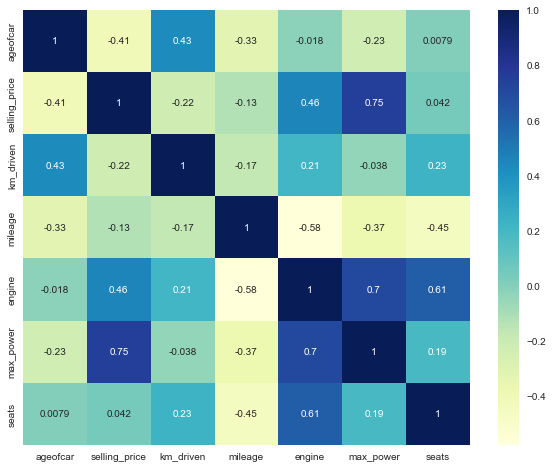

In [27]:
plt.style.use('seaborn')
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True ,cmap="YlGnBu" )
plt.show()

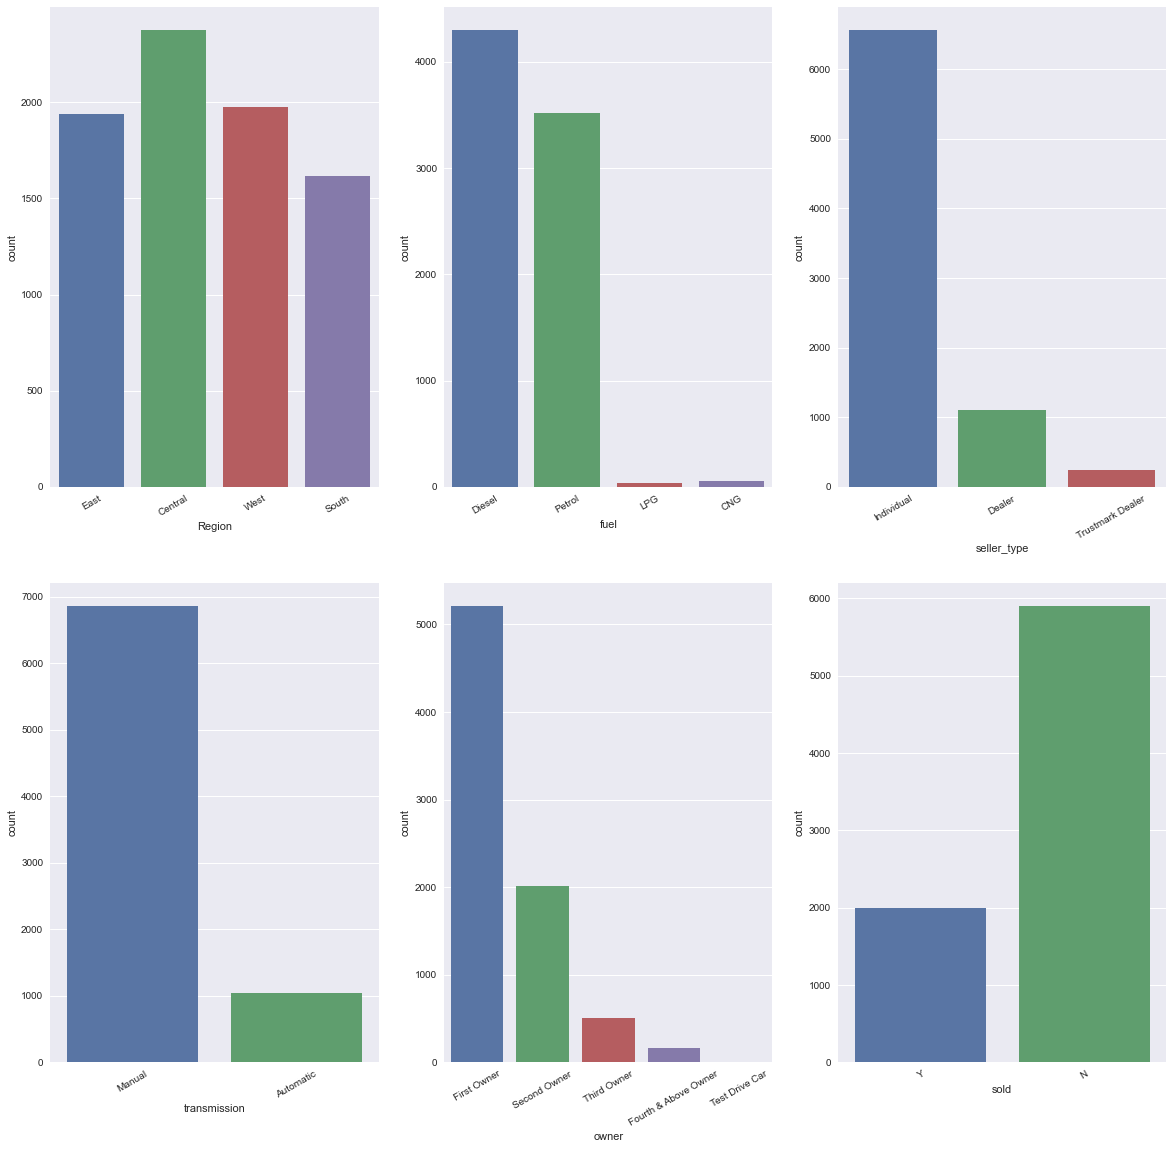

In [28]:
plt.figure(figsize=(20,30),facecolor='white')
v=1
df1 = df[['Region','fuel','seller_type','transmission','owner','sold']]
for i in df1.columns:
    ax=plt.subplot(3,3,v)
    sns.countplot(df[i])
    plt.xticks(rotation=30)
    v+=1
plt.show() 

# 1. Most of the cars are manual transmission, as automatic has come to vogue only lately.
# 2. Most cars are Diesel powered and individually owned by the seller.
# 3. Central Region has most cars.

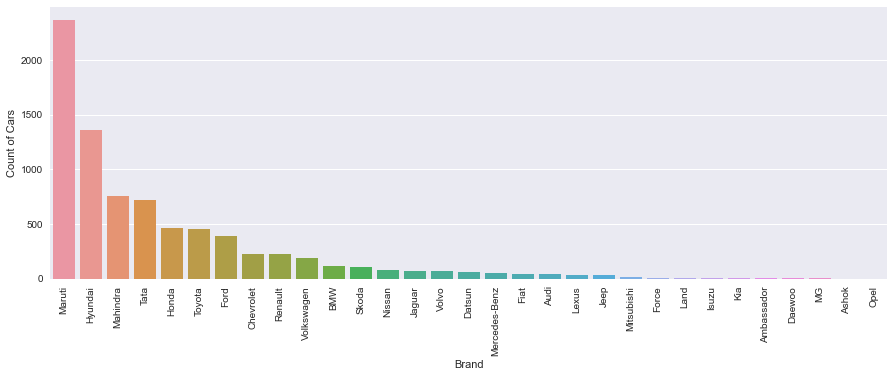

<Figure size 576x396 with 0 Axes>

In [29]:
fig, ax = plt.subplots(figsize = (15,5));
plt1 = sns.countplot(df['brand'], order=pd.value_counts(df['brand']).index,);
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars');
plt.xticks(rotation = 90);
plt.show();
plt.tight_layout();

# Most cars are of Brands Maruti,Hyndai and Mahindra owing to their competitive prices.

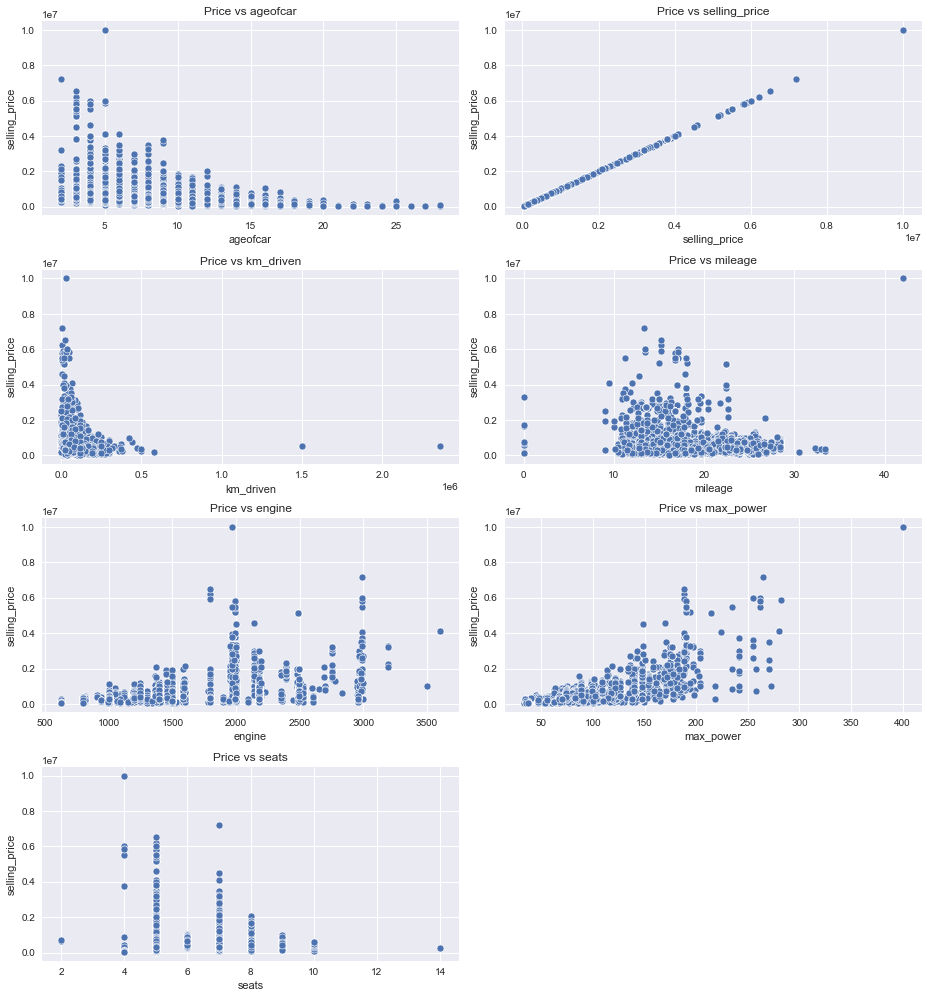

In [30]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))
for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=df[variable],y=df['selling_price']).set(title='Price vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

In [31]:
def Perform_log_transform(df,col_log):
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()

In [32]:
Perform_log_transform(df,['km_driven','selling_price','max_power'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              7906 non-null   object 
 1   model              7906 non-null   object 
 2   ageofcar           7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   fuel               7906 non-null   object 
 7   seller_type        7906 non-null   object 
 8   transmission       7906 non-null   object 
 9   owner              7906 non-null   object 
 10  mileage            7906 non-null   float64
 11  engine             7906 non-null   float64
 12  max_power          7906 non-null   float64
 13  seats              7906 non-null   int64  
 14  sold               7906 non-null   object 
 15  km_driven_log      7906 non-null   float64
 16  selling_price_log  7906 

In [33]:
df.drop(['brand','model'],axis=1,inplace=True)

In [34]:
df.head(1)

,ageofcar,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,km_driven_log,selling_price_log,max_power_log
0,8,450000,145500,East,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5,Y,11.887931,13.017003,4.304065


In [35]:
df = pd.get_dummies(df,columns=['Region','fuel','seller_type','transmission','owner','sold'],drop_first=True)

In [36]:
df.head()

,ageofcar,selling_price,km_driven,mileage,engine,max_power,seats,km_driven_log,selling_price_log,max_power_log,...,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,sold_Y
0,8,450000,145500,23.40,1248.0,74.00,5,11.887931,13.017003,4.304065,...,0,0,1,0,1,0,0,0,0,1
1,8,370000,120000,21.14,1498.0,103.52,5,11.695247,12.821258,4.639765,...,0,0,1,0,1,0,1,0,0,1
2,16,158000,140000,17.70,1497.0,78.00,5,11.849398,11.970350,4.356709,...,0,1,1,0,1,0,0,0,1,1
3,12,225000,127000,23.00,1396.0,90.00,5,11.751942,12.323856,4.499810,...,0,0,1,0,1,0,0,0,0,1
4,15,130000,120000,16.10,1298.0,88.20,5,11.695247,11.775290,4.479607,...,0,1,1,0,1,0,0,0,0,1


In [40]:
df[['ageofcar','selling_price','selling_price_log','km_driven','km_driven_log','mileage','engine','max_power','max_power_log','seats']] = scaler.fit_transform(df[['ageofcar','selling_price','selling_price_log','km_driven','km_driven_log','mileage','engine','max_power','max_power_log','seats']])

In [41]:
x = df.drop(['selling_price','selling_price_log'],axis=1)
y = df[['selling_price','selling_price_log']]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=101)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
l_model = LinearRegression()

In [46]:
l_model.fit(xtrain,ytrain)

LinearRegression()

In [47]:
pred = l_model.predict(xtest)

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
r2_score(ytest,pred)

0.8100063662586361

# The model gives an r2 score of 0.81 i.e. Our model is able to Explain 81% of the variation that is caused on the “selling_price” variable

In [50]:
MAE = mean_absolute_error(ytest,pred)
MSE = mean_squared_error(ytest,pred)
RMSE = np.sqrt(MSE)

In [51]:
MAE

0.2872255757734131

In [52]:
MSE

0.1780751470614219

In [53]:
RMSE

0.42198951060591766

In [54]:
from sklearn.linear_model import RidgeCV

In [55]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [56]:
ridge_cv_model.fit(xtrain,ytrain)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [57]:
test_predictions1 = ridge_cv_model.predict(xtest)

In [58]:
ridge_cv_model.coef_

array([[-0.19484794,  0.03708505,  0.04670408,  0.06212801,  1.55758945,
        -0.03479664, -0.1554502 , -1.03336653, -0.00268487,  0.03038204,
        -0.01999119,  0.2091352 ,  0.15592044,  0.01284628, -0.29169008,
        -0.24181915, -0.28727071,  0.01101773, -0.02515277,  0.82822329,
         0.00710683,  0.02635507],
       [-0.48582073,  0.0150397 ,  0.06004482,  0.15049866,  0.35055196,
         0.03195854, -0.07350879,  0.08979137, -0.00428345,  0.01145136,
        -0.02187576,  0.19240321,  0.18130876, -0.00228769, -0.14668757,
        -0.02397884, -0.21086764, -0.13890559, -0.07567473,  0.23650535,
        -0.10697769,  0.00971401]])

In [60]:
MAE = mean_absolute_error(ytest,test_predictions1)
MSE = mean_squared_error(ytest,test_predictions1)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.28681029440928923
0.17812638433126188
0.42205021541430576


In [61]:
r2_score(ytest,test_predictions1)

0.8099440346779336

In [62]:
from sklearn.linear_model import MultiTaskLassoCV

In [63]:
lasso_cv_model = MultiTaskLassoCV(eps=0.1,n_alphas=100,cv=5)

In [64]:
lasso_cv_model.fit(xtrain,ytrain)

MultiTaskLassoCV(cv=5, eps=0.1)

In [65]:
test_predictions2 = lasso_cv_model.predict(xtest)

In [66]:
MAE = mean_absolute_error(ytest,test_predictions2)
MSE = mean_squared_error(ytest,test_predictions2)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.3312435732102085
0.256568339507077
0.5065257540412699


In [67]:
from sklearn.linear_model import MultiTaskElasticNetCV

In [68]:
elastic_model = MultiTaskElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [69]:
elastic_model.fit(xtrain,ytrain)

MultiTaskElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [70]:
test_predictions3 = elastic_model.predict(xtest)

In [71]:
MAE = mean_absolute_error(ytest,test_predictions3)
MSE = mean_squared_error(ytest,test_predictions3)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.2864668219514983
0.17823612618688967
0.422180205820796


In [72]:
r2_score(ytest,test_predictions3)

0.8098360601944083

In [73]:
l_model.coef_

array([[-1.99029594e-01,  3.86281966e-02,  4.67308636e-02,
         5.84978071e-02,  1.62454677e+00, -3.24731930e-02,
        -1.54339946e-01, -1.10033746e+00,  6.96157767e-04,
         3.45511392e-02, -1.73463795e-02,  3.16672460e-01,
         3.08117805e-01,  1.12123361e-01, -2.88803013e-01,
        -2.36802068e-01, -2.73585256e-01,  1.28595718e-02,
        -2.38855988e-02,  2.48835751e+00,  7.56664265e-03,
         2.77816783e-02],
       [-4.86526210e-01,  1.55655676e-02,  6.09839493e-02,
         1.51257820e-01,  3.56721834e-01,  3.21250908e-02,
        -7.31115860e-02,  8.22092486e-02, -3.94879899e-03,
         1.19019367e-02, -2.20442981e-02,  2.82466221e-01,
         3.42543128e-01,  8.67380308e-02, -1.45166188e-01,
        -2.33050597e-02, -2.12117765e-01, -1.49980758e-01,
        -7.65527804e-02,  7.11510635e-01, -1.10773479e-01,
         1.01767749e-02]])

# Check linear regression assumptions

# 1)No Multicollinearity

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

In [199]:
print(checking_vif(xtrain))

                         feature        VIF
0                       ageofcar   2.478446
1                      km_driven   2.199505
2                        mileage   2.895290
3                         engine   5.582159
4                      max_power  18.802386
5                          seats   2.210183
6                  km_driven_log   2.882848
7                  max_power_log  17.049416
8                    Region_East   1.844533
9                   Region_South   1.688186
10                   Region_West   1.847601
11                   fuel_Diesel  10.589653
12                      fuel_LPG   1.086658
13                   fuel_Petrol   9.311911
14        seller_type_Individual   8.332421
15  seller_type_Trustmark Dealer   1.287181
16           transmission_Manual  12.575252
17    owner_Fourth & Above Owner   1.127037
18            owner_Second Owner   1.725235
19          owner_Test Drive Car   1.010274
20             owner_Third Owner   1.292160
21                        sold_Y

# VIF value for  max_power and  max_power_log is high we can drop those for a better model. Rest of the parameters like fuel type,transmission cannot be dropped.

# 2) Normality of error terms

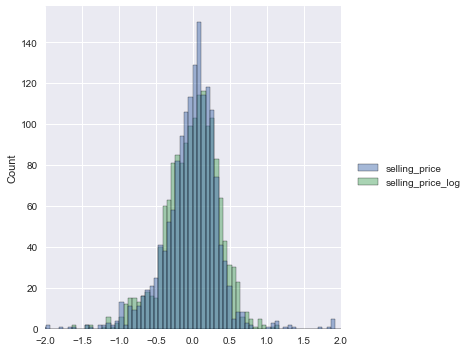

In [201]:
error = ytest-pred
sns.displot(error);
plt.xlim(-2,2);

# The Errors seem normally distributed

# 3) Linearity of variables

In [202]:
resd = ytest - pred

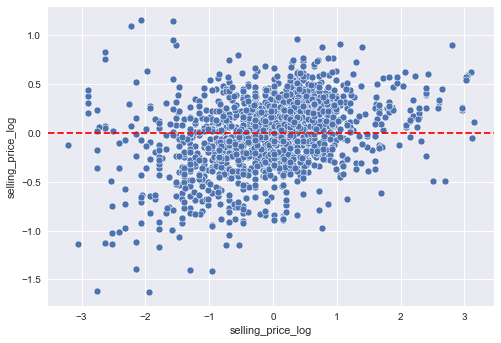

In [213]:
sns.scatterplot(x=ytest['selling_price_log'],y=resd['selling_price_log'])
plt.axhline(y=0, color='r', linestyle='--')

# There is no pattern in the residual plot

# 4) No Homoskedasticity

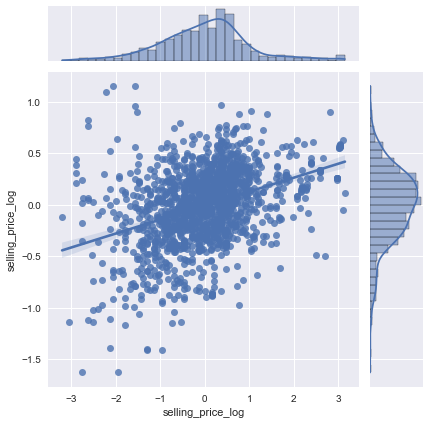

In [218]:
sns.jointplot(x=ytest['selling_price_log'],y=resd['selling_price_log'],kind='reg')

# The Blue Highlighted light is the variance around the line, There is some variance but it is fine to carry on as model is not going to be perfect. So, we can say Assumption 4 is satisfied.